In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
import cmath
from numpy import pi
from scipy.integrate import odeint
from ipywidgets import interact

 ### Co-efficient of Pressure (Cp ) , along the surface of the cylinder at a function of θ


In [2]:
#(p - p_inf)/ 0.5*ρ*U_inf*U_inf 
#1 - q * q/(U_inf * U_inf) 
#1 - 4(sinθ*sinθ)
theta = np.linspace(0, 2*pi, 300)
Cp = 1 - 4*((np.sin(theta)))**2

<IPython.core.display.Javascript object>


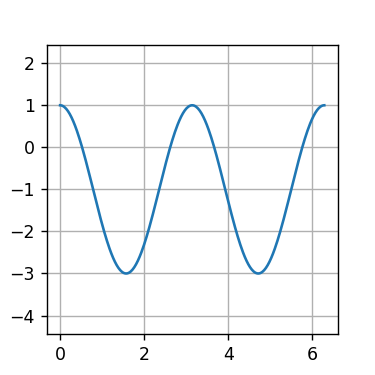

In [3]:
x, y = np.mgrid[-1:1:10j, -1:1:10j]
plt.figure(figsize=(3,3))
plt.axis('equal')
plt.grid()
plt.plot(theta , Cp)

In [4]:
#ﬂow speed on the surface of the cylinder is found as q at r=a and U_theta at r=a  which is 2U|sinθ|


<IPython.core.display.Javascript object>


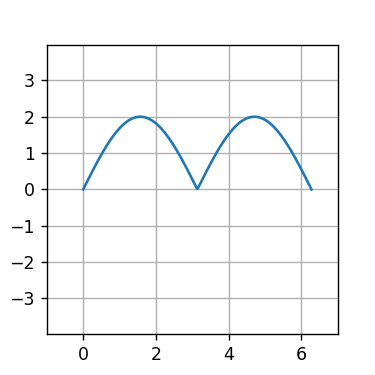

In [5]:
V_surface = 2*(np.sin(theta))
x, y = np.mgrid[-1:1:10j, -1:1:10j]
plt.figure(figsize=(3,3))
plt.axis('equal')
plt.xlim(-1,7)
plt.ylim(-4,4)
plt.grid()
plt.plot(theta ,abs(V_surface))
    
    


### streamlines outside the cylinder

<IPython.core.display.Javascript object>


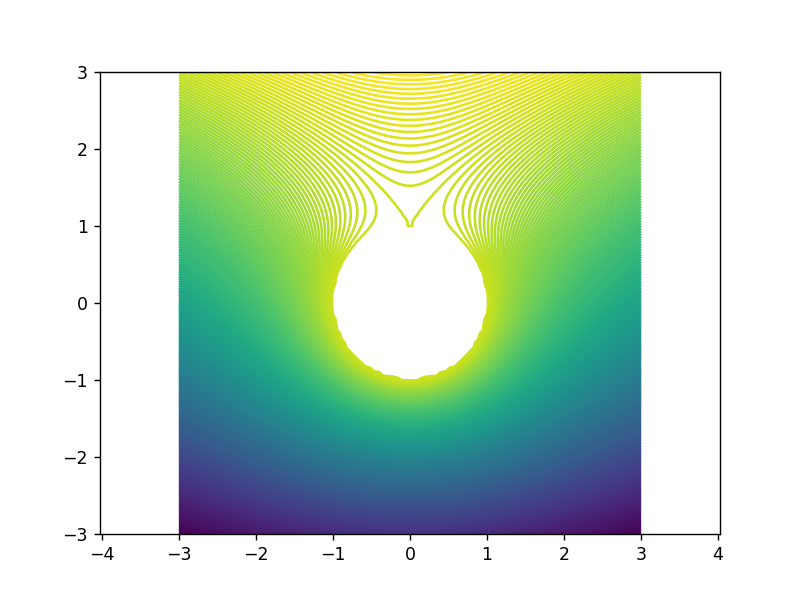

In [6]:
x, y = np.mgrid[-3:3:100j, -3:3:100j]
z = x + 1j*y

Γ=4*np.pi
w = z+1/z -1j*Γ*np.log(z)/(2*pi)
w[np.abs(z) < 0.999]=np.nan
plt.figure()
plt.axis('equal')
plt.contour(x, y, w.imag, 300)
    


### Potential lines


In [7]:
def potentialfield(O):
    x,y=np.mgrid[-3:3:500j,-3:3:500j]
    z=x+1j*y
    phi1=z+1.0/z+1j*(O/2*np.pi)*np.log(z)
    phi10=phi1.copy()
    phi10[np.abs(z)<0.984]=np.nan
    
    plt.figure()
    plt.contour(x,y,phi10.real,100)
interact(potentialfield, O=(-5*np.pi,5*np.pi,0.2*np.pi))

interactive(children=(FloatSlider(value=0.0, description='O', max=15.707963267948966, min=-15.707963267948966,…

<function __main__.potentialfield(O)>

### velocity at the surface of the cylinder as a function of theta

In [8]:
#At the surface of the cylinder, velocity is entirely tangential and is given by
#u_theta at r = a is − 2*U*sin(theta) −Γ/2*pi*a
#which vanishes if
#sinθ =−Γ/4*pi*a*U
#For Γ<4πaU, two values of θ satisfy, implying that there are two stagnation points on the surface. 

In [9]:
def V_surface1(Γ1):
    U = 1
    a = 1
    V_surface1 = -2*U*np.sin(theta) + Γ1/2*pi*a
    V1 = abs(V_surface1)
    plt.figure(figsize=(3,3))
    plt.axis('equal')
    plt.grid()
    plt.plot(theta,V1)
interact (V_surface1 , Γ1=(0,15,2))

interactive(children=(IntSlider(value=6, description='Γ1', max=15, step=2), Output()), _dom_classes=('widget-i…

<function __main__.V_surface1(Γ1)>

### pressure field all over the domain.

In [10]:
x, y = np.mgrid[-10:10:500j, -10:10:500j]
z = x + 1j*y
def P(Γ2):
    P = 1 - 1/(z*z) - 1j*Γ2/(2*pi*z)     # U_infinity = 1 ,a = 1 
    S = 1 - abs(P)**2
    S[np.abs(z) < 0.999]=np.nan
    plt.figure(figsize=(3,3))
    plt.axis('equal')
    plt.contour(x , y , S , 200)
interact(P, Γ2 = (0,3,0.5))



interactive(children=(FloatSlider(value=1.0, description='Γ2', max=3.0, step=0.5), Output()), _dom_classes=('w…

<function __main__.P(Γ2)>

### Plot of the Cp distribution as a function of θ for different Γ.

In [11]:
def cop(Γ2):
    theta = np.linspace(0,2*pi,200)
    z = 1*np.exp(1j*theta)
    velocity = 1 - 1/(z*z) - 1j*Γ2/(2*pi*z)
    v = np.abs(velocity)
    Cp = 1 - v**2                          
    plt.figure(figsize=(3,3))
    plt.xlabel("theta")
    plt.ylabel("COP")
    plt.axis('equal')
    plt.xlim(-10,10)
    plt.ylim(-50,50)
    plt.grid()
    plt.plot(theta, Cp)
interact (cop, Γ2=(-5,5))    

interactive(children=(IntSlider(value=0, description='Γ2', max=5, min=-5), Output()), _dom_classes=('widget-in…

<function __main__.cop(Γ2)>

In [12]:
e =int(input("Enter the angle of attack in degrees :"))
def circulation(T):
    x,y=np.mgrid[-30:30:500j,-30:30:500j]
    z=x+1j*y
    d= -e*np.pi/180.0
    rot=cmath.rect(1,-d)
    zeta=z*rot 
    phiangle=zeta+1.0/zeta+1j*(T/2*np.pi)*np.log(zeta)
    phiangle[np.abs(z)<0.94] = np.nan*(1+1j)
    plt.figure(figsize=(5,5))
    plt.axis('equal')
    plt.contour(x,y,phiangle.imag,50)   
    
interact(circulation,T=(0,5*pi,0.1*pi)) 

Enter the angle of attack in degrees :10


interactive(children=(FloatSlider(value=7.853981633974483, description='T', max=15.707963267948966, step=0.314…

<function __main__.circulation(T)>

In [14]:
e =int(input("Enter the angle of attack in degrees :"))
def copangle(gamma):
    th = np.linspace(0,2*pi,200)
    z = 1*np.exp(1j*th)
    d= -e*np.pi/180.0
    rot=cmath.rect(1,-d)
    zeta=z*rot
    vel = rot - 1/(z*z) - 1j*gamma/(2*pi*z)
    vmag = np.abs(vel)
    Cp = 1 - vmag*vmag                          
    plt.figure()
    plt.plot(th, Cp)
interact(copangle,gamma = (-5*np.pi,5*np.pi,0.25*np.pi))    

Enter the angle of attack in degrees :10


interactive(children=(FloatSlider(value=0.0, description='gamma', max=15.707963267948966, min=-15.707963267948…

<function __main__.copangle(gamma)>